In [1]:
# Import packages
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

In [3]:
df =pd.read_csv('objective_20210817-213751.csv')

In [46]:
df

,1,2,3
0,373.745531,358.486659,336.477337
1,386.200330,370.008639,336.606179
2,386.968561,368.707891,337.162651
3,386.200799,370.488446,339.281505
4,379.667978,369.437642,336.994225
...,...,...,...
495,388.276850,370.736715,341.160014
496,385.345152,360.441176,338.582654
497,380.951390,347.363181,331.562438
498,386.853444,368.713838,336.477337


In [47]:
df['3'][df['3']==max(df['3'])]=max(df['2'])

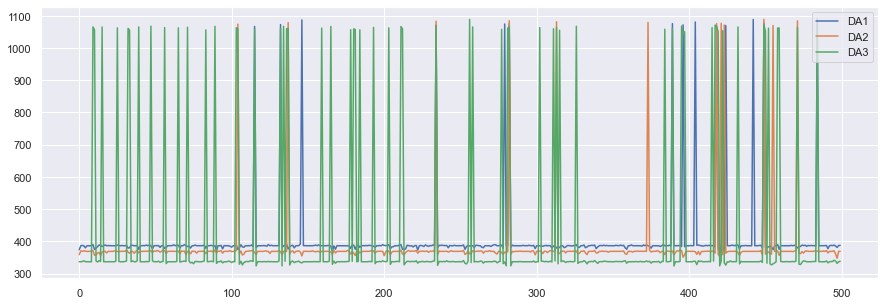

<Figure size 432x288 with 0 Axes>

In [58]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
x=np.arange(500)
y=df['1']
ax.plot(x,y)
y=df['2']
ax.plot(x,y)
y=df['3']
ax.plot(x,y)
ax.legend(['DA1','DA2','DA3'],loc='upper right')
plt.show()
plt.savefig('objective_functions.png')

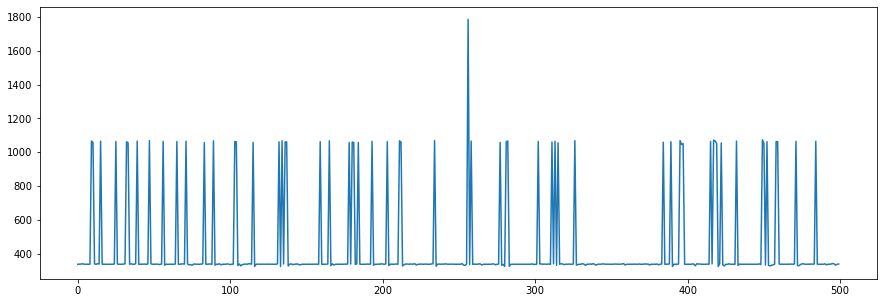

In [28]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
x=np.arange(500)
y=df['3']
ax.plot(x,y)
plt.show()

In [57]:
np.argmax(df.sum(axis=1))+1

450

In [29]:
import seaborn as sns
sns.set()

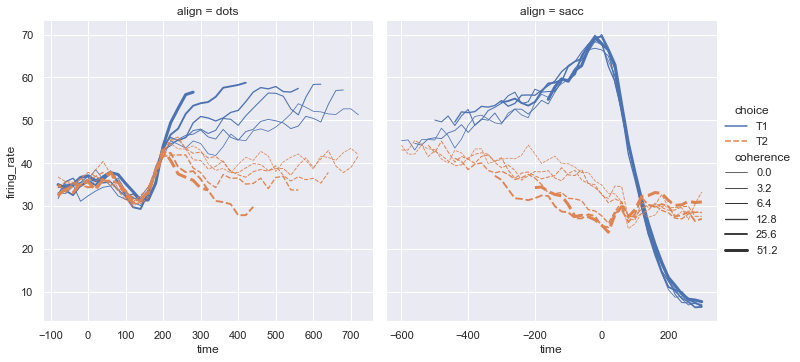

In [33]:
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

In [34]:
dots

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
843,sacc,T2,300,3.2,33.281734
844,sacc,T2,300,6.4,27.583979
845,sacc,T2,300,12.8,28.511530
846,sacc,T2,300,25.6,27.009804


In [43]:
df['3'][df['3']==max(df['3'])]=max(df['2'])

In [44]:
max(df['3'])

1088.8818372784822